In [5]:
import glob
import pickle
import re

from joblib import Parallel, delayed
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, MACCSkeys
from rdkit.Chem.AtomPairs import Pairs, Torsions
import seaborn as sns

from gesim import gesim

sns.set_theme(rc={"figure.dpi": 500})

# Single Assay

Count of >0.8
mfp: 589.0
fcfp: 596.0
maccs: 557.0
apfp: 626.0
ttfp: 625.0
gesim: 618.0


/tmp/ipykernel_3642854/1955183921.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=16, rotation=30)
/tmp/ipykernel_3642854/1955183921.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)


Text(0, 0.5, 'Count')

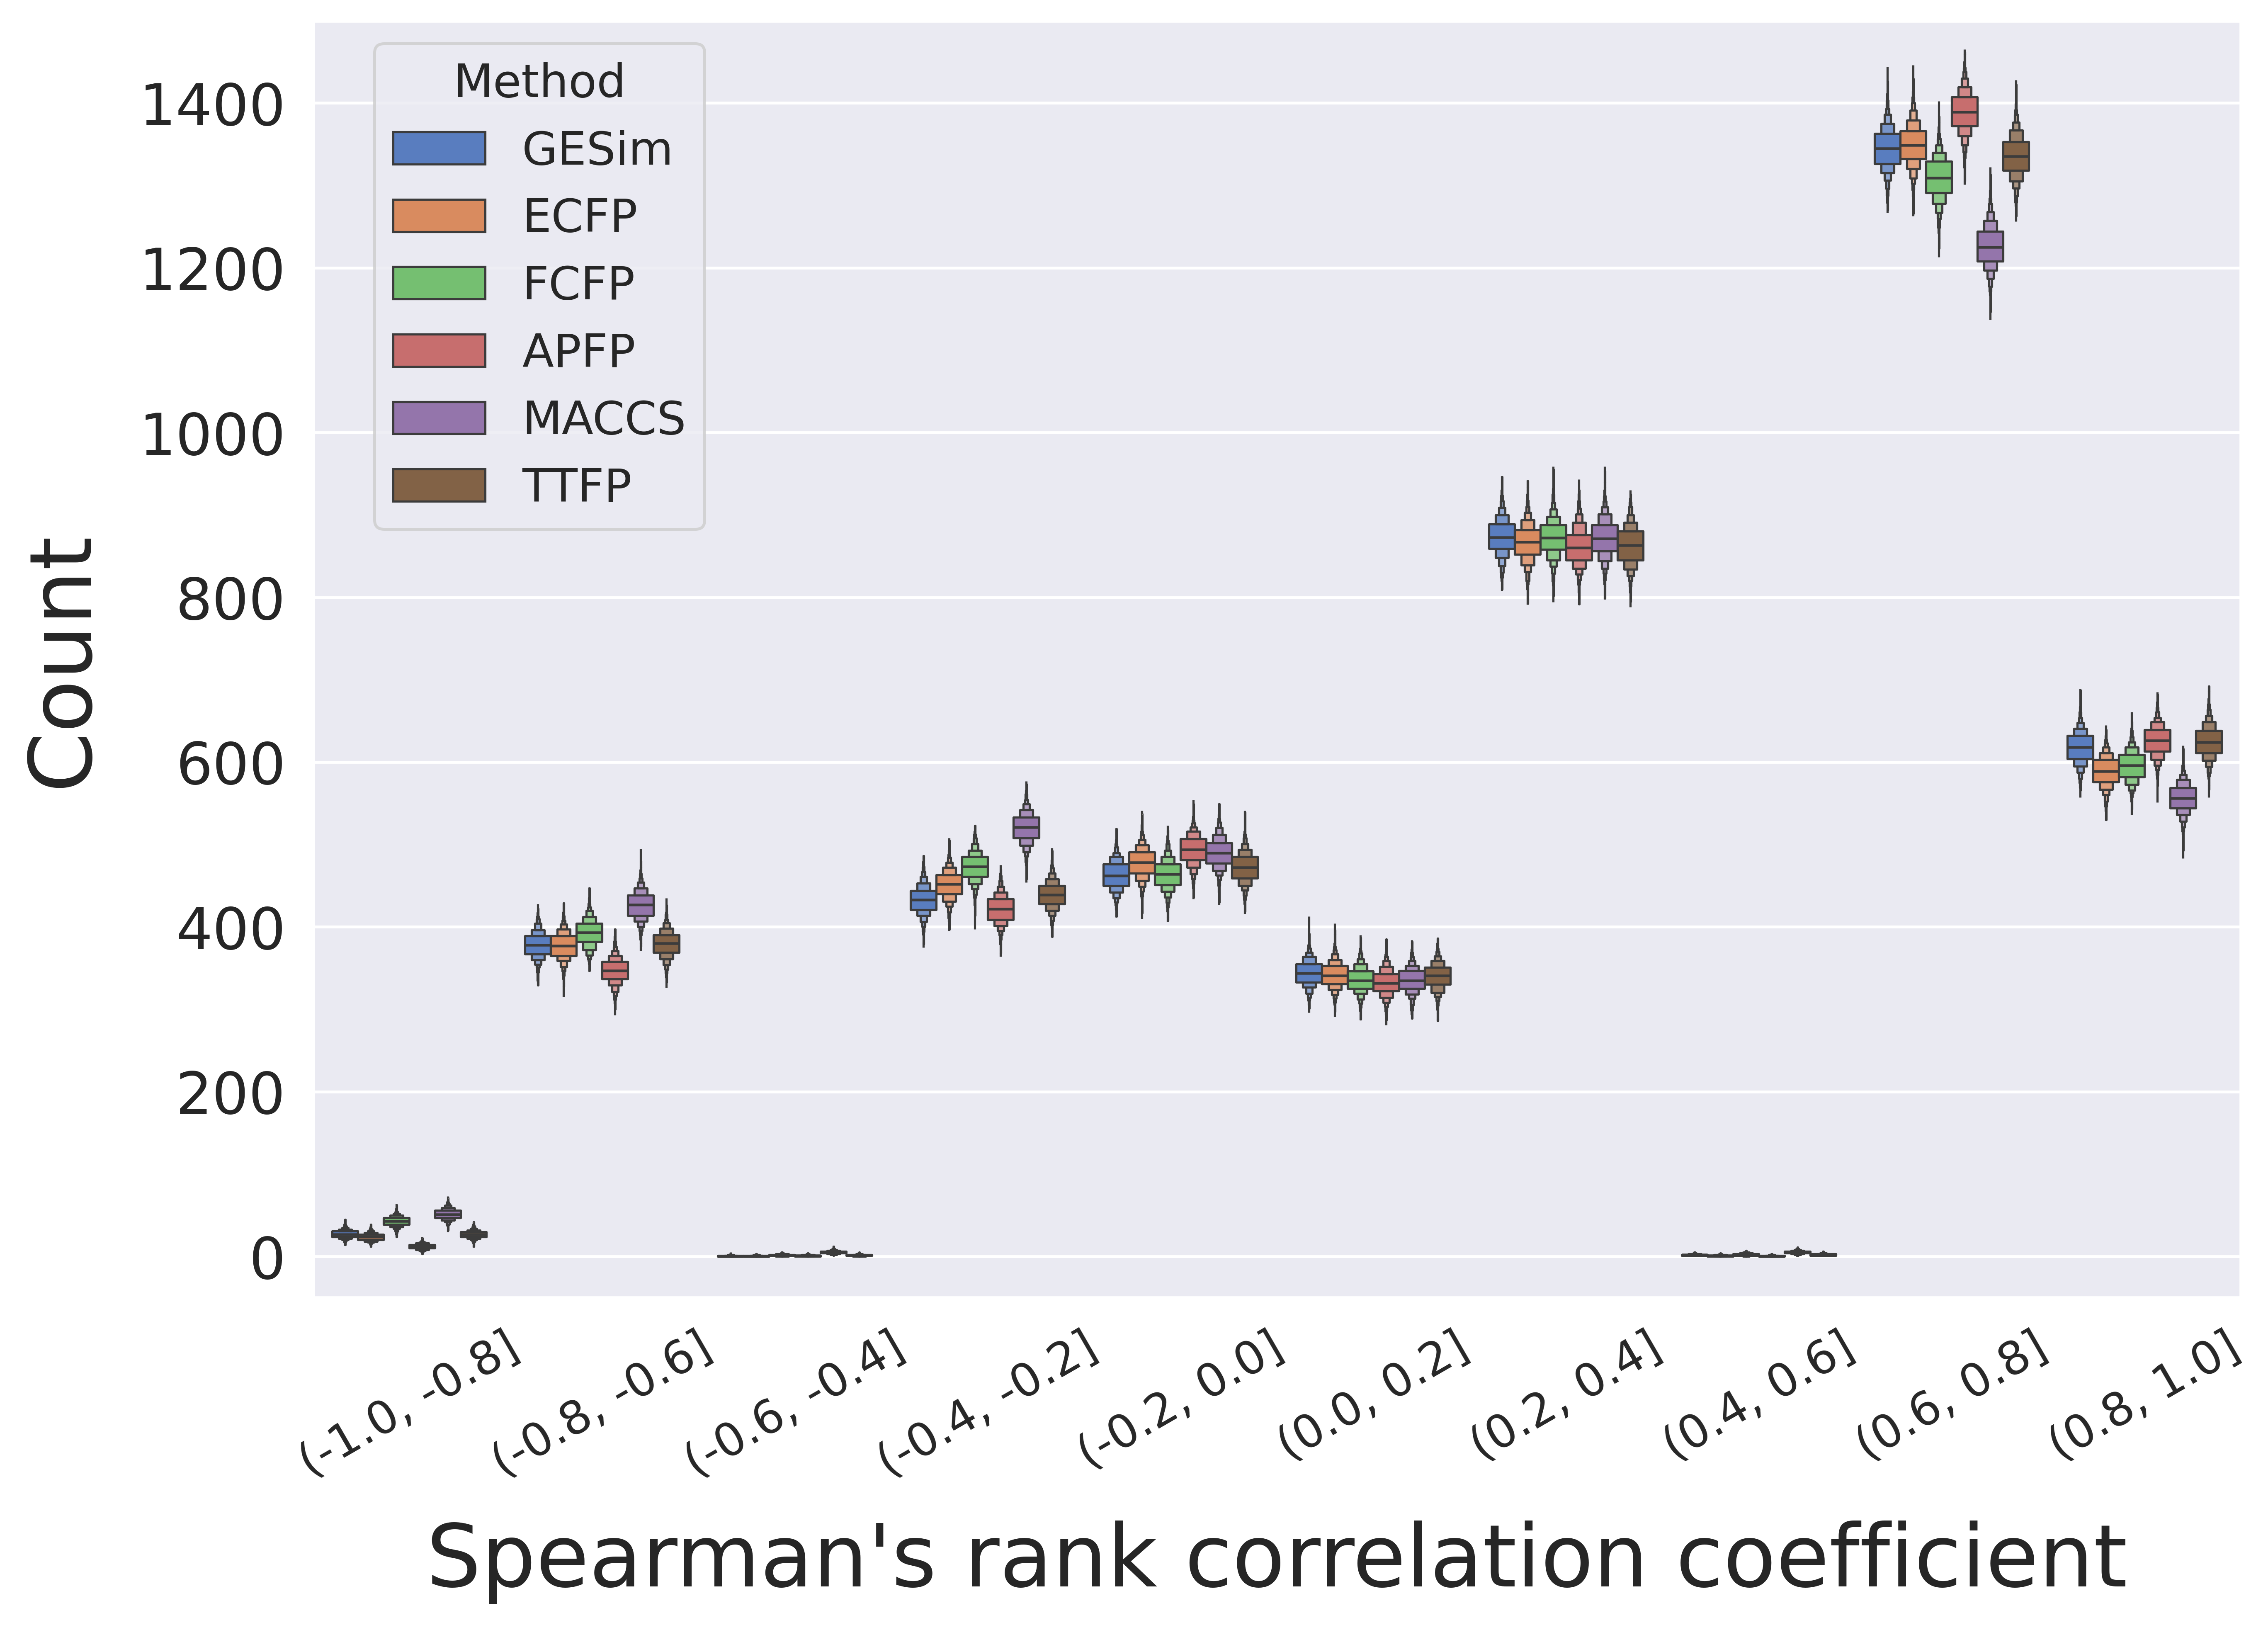

In [10]:
with open('result/similaritybenchmark/result_single_assay.pkl', 'rb') as f:
    result_dict = pickle.load(f)

print("Count of >0.8")
for k in result_dict.keys():
    df = pd.DataFrame(result_dict[k])
    corr_cnt = (df > 0.8).sum(axis=1).mean()
    print(f"{k}: {round(corr_cnt, 0)}")
    
    

bins = [round(i, 2) for i in np.linspace(-1, 1, 11)]
concat_list = []

method_list = ['ttfp', 'maccs', 'apfp', 'fcfp', 'mfp', 'gesim']  # To unify the colors of LBVS and SS benchmarks
rename_dict = {
    "ttfp": "TTFP",
    "maccs": "MACCS",
    "apfp": "APFP",
    "fcfp": "FCFP",
    "mfp": "ECFP",
    "gesim": "GESim",
}
for method_name in method_list:
#for method_name in result_dict.keys():
    for i in range(len(result_dict[method_name])):
        bin_count_df = pd.cut(result_dict[method_name][i], bins=bins).value_counts().rename_axis('bins').reset_index()
        bin_count_df['method'] = [rename_dict[method_name] for _ in range(bin_count_df.shape[0])]
        concat_list.append(bin_count_df)
df_vis = pd.concat(concat_list)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
sns.boxenplot(
    data=df_vis.iloc[::-1],
    x='bins',
    y="count",
    hue='method',
    ax=ax,
    #palette=sns.color_palette("muted")[:6][::-1],
    palette=sns.color_palette("muted")[:6],
    dodge=0.6,
    k_depth='full',
    width=0.8,
)
ax.set_ylim([-50, 1500])
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[::-1], labels[::-1], title="Method", loc='upper left', bbox_to_anchor=(0.02, 1.), fontsize=16, title_fontsize=16, frameon=True)
ax.legend(title="Method", loc='upper left', bbox_to_anchor=(0.02, 1.), fontsize=16, title_fontsize=16, frameon=True)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16, rotation=30)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)
ax.set_xlabel("Spearman's rank correlation coefficient", fontsize=30, labelpad=12)
ax.set_ylabel("Count", fontsize=30, labelpad=12)

#fig = plt.figure(figsize=(12, 8))
#ax = fig.add_subplot(1, 1, 1)
#sns.pointplot(data=df_vis, x='bins', y="count", hue='method', ax=ax, errorbar='sd', errwidth=2,
#              palette=sns.color_palette("muted")[:6][::-1], dodge=0.35, markersize=6)
#ax.set_ylim([-50, 1500])
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[::-1], labels[::-1], title="Method", loc='upper left', bbox_to_anchor=(0.02, 1.), fontsize=18, title_fontsize=18, frameon=True)
#ax.set_xticklabels(ax.get_xticklabels(), fontsize=16, rotation=30)
#ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)
#ax.set_xlabel("Spearman's rank correlation coefficient", fontsize=30, labelpad=12)
#ax.set_ylabel("Count", fontsize=30, labelpad=12)

In [3]:
summary_df = df_vis.groupby(['bins', 'method']).agg(
    mean_count=('count', 'mean'),
    std_count=('count', 'std')
).reset_index()
summary_df

/tmp/ipykernel_3614440/1417438283.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_df = df_vis.groupby(['bins', 'method']).agg(


,bins,method,mean_count,std_count
0,"(-1.0, -0.8]",APFP,12.128,3.254567
1,"(-1.0, -0.8]",ECFP,23.729,4.631740
2,"(-1.0, -0.8]",FCFP,42.653,6.085690
3,"(-1.0, -0.8]",GESim,27.433,4.923388
4,"(-1.0, -0.8]",MACCS,51.430,6.537878
5,"(-1.0, -0.8]",TTFP,26.858,4.667936
6,"(-0.8, -0.6]",APFP,346.935,15.986129
7,"(-0.8, -0.6]",ECFP,377.259,16.808821
8,"(-0.8, -0.6]",FCFP,392.910,17.081325
9,"(-0.8, -0.6]",GESim,378.578,15.999685


In [6]:
# Preparation
##
with open('result/similaritybenchmark/result_single_assay.pkl', 'rb') as f:
    result_dict = pickle.load(f)
df_list = []

for i in range(len(result_dict['gesim'])):
    vs = []
    #print("Count of >0.8")
    for k in result_dict.keys():
        vs.append(pd.DataFrame({k: result_dict[k][i]}))
    df_list.append(pd.concat(vs, axis=1))
df = pd.concat(df_list, axis=0)
df.reset_index(inplace=True)

df['max_corr'] = df[['mfp', 'fcfp', 'maccs', 'apfp', 'ttfp']].max(axis=1)
df['gesim_diff'] = df['gesim'] - df['max_corr']

## 
def extract_number(f):
    return int(re.search(r'\d+', f).group())

files = sorted(glob.glob("./data/similaritybenchmark/SingleAssay/dataset/*.txt"), key=extract_number)
uniq_num_single_set = set()
for fname in files:
    with open(fname, 'r') as f:
        lines = [l.strip('\n') for l in f.readlines()]
    for l in lines:
        numbers = l.split()
        uniq_num_single_set.update(map(int, numbers))

with open('./data/chembl_20.smi', 'r') as f:
    lines = [l.strip('\n').split('\t') for l in f.readlines()]
used_chembl_ids = uniq_num_single_set
id_smi_dict = {}
for smi, k in lines:
    if int(k) in used_chembl_ids:
        id_smi_dict[k] = smi  #Chem.MolFromSmiles(smi)

smi_list = []
used_num_sigle = 4563
ref_rank = range(4, 0, -1)

for fname in files:
    with open(fname, 'r') as f:
        lines = [l.strip('\n') for l in f.readlines()]

    for l in lines[:used_num_sigle]:
        sim_rank_list = l.split()
        sim_smi_rank_list = [id_smi_dict[i] for i in sim_rank_list]
        smi_list.append(sim_smi_rank_list)
##        

df_smi = pd.DataFrame(smi_list, columns=["ref", "smi_rank1", "smi_rank2", "smi_rank3", "smi_rank4"])
df_concat = pd.concat([df, df_smi], axis=1)
df_drop_dup = df_concat.drop_duplicates(
    subset=['ref', 'smi_rank1', 'smi_rank2', 'smi_rank3', 'smi_rank4'],
    keep="first"
)
df_drop_dup["is_best_rho_gesim"] = df_drop_dup["gesim_diff"] > 0.
df_drop_dup.reset_index(drop=True, inplace=True)
df_drop_dup

/tmp/ipykernel_3642854/517998153.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop_dup["is_best_rho_gesim"] = df_drop_dup["gesim_diff"] > 0.


,index,mfp,fcfp,maccs,apfp,ttfp,gesim,max_corr,gesim_diff,ref,smi_rank1,smi_rank2,smi_rank3,smi_rank4,is_best_rho_gesim
0,0,0.316228,0.316228,0.316228,0.400000,0.400000,0.400000,0.400000,0.000000,Clc1ccc2c(NCCCCCCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)...,Clc1ccc2c(NCCCCCCCCNc3c4c(nc5cc(Cl)ccc35)CCCC4...,c1cnc2nc3c(c(NCCCCCCCCNc4c5c(nc6ncccc46)CCCC5)...,c1cnc2nc3c(c(NCCCCCCNc4c5c(nc6ncccc46)CCCC5)c2...,c1ccc2c(NCCCCCCCNc3c4c(nc5ccccc35)CCC4)c3c(nc2...,False
1,1,0.400000,0.400000,0.800000,0.400000,0.105409,0.105409,0.800000,-0.694591,C[C@@H]1CCCN1CCCOc1ccc(-c2ccc(=O)n(C)n2)cc1,CCn1nc(-c2ccc(OCCCN3CCC[C@H]3C)cc2)ccc1=O,C[C@H]1CCCN1CCCOc1ccc(-c2ccc(=O)[nH]n2)cc1,C[C@@H]1CCCN1CCCOc1ccc(-n2ncccc2=O)cc1,Cn1nc(-c2ccc(OCCCN3CCC[C@H]3CO)cc2)ccc1=O,False
2,2,0.200000,-0.632456,0.210819,-0.400000,-0.800000,0.400000,0.210819,0.189181,CC(C)C[C@H](NC(=O)[C@H](C)NC(=O)C[C@H](O)[C@H]...,CC(C)C[C@H](NC(=O)[C@H](C)NC(=O)C[C@H](O)[C@H]...,COc1cccc(CCNC(=O)C[C@H](O)[C@H](COCc2ccc(Br)cc...,CC(C)C[C@H](NC(=O)[C@H](C)NC(=O)C[C@H](O)[C@H]...,CC(C)C[C@H](NC(=O)[C@H](C)NC(=O)C[C@H](O)[C@H]...,True
3,3,-0.400000,-0.200000,0.200000,0.948683,-0.316228,-0.316228,0.948683,-1.264911,N[C@@H]1C[C@H](NC(=O)c2ccc(O)cc2)[C@H](OC(=O)c...,O=C(NC1C2CCC(C2)C1OC(=O)c1cc(O)c(C(=O)c2c(O)cc...,CC(C)C1C[C@@H](NC(=O)c2ccc(O)cc2)[C@H](OC(=O)c...,CC(=O)C1C[C@@H](NC(=O)c2ccc(O)cc2)[C@H](OC(=O)...,O=C(N[C@@H]1COCCC[C@H]1OC(=O)c1cc(O)c(C(=O)c2c...,False
4,4,0.800000,0.800000,1.000000,0.800000,0.400000,0.800000,1.000000,-0.200000,O=C(NCCCNC(=O)c1ccc2c(O)c(O)ccc2c1)c1ccc2c(O)c...,O=C(NCCCNC(=O)c1ccc2cc(O)c(O)cc2c1)c1ccc2cc(O)...,O=C(O)c1ccc2cc(O)c(O)cc2c1,COC(=O)c1ccc2c(O)c(O)ccc2c1,O=C(O)c1ccc2cc(O)ccc2c1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826735,4523,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,COc1cc(OC)c2cc(-c3ccncc3)cnc2c1,COc1cc2cc(-c3ccccc3)c(Cl)nc2cc1OC,N#C/C(=C\c1ccc(O)c(O)c1)C(=O)Nc1ccccc1,COc1cc2cc(-c3ccsc3)cnc2cc1OC,N#C/C(=C\c1c[nH]c2ccccc12)c1nc2ccccc2s1,False
826736,4542,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.400000,-0.400000,O=[N+]([O-])/N=C1\NCCN1CC1CCOC1,CC(=O)CCN1CCN/C1=N\[N+](=O)[O-],CC(=O)CCN1CCN(Cc2ccc(Cl)nc2)/C1=N/[N+](=O)[O-],O=[N+]([O-])/N=C1\NCCN1C[C@@H]1C[C@@H]2O[C@@H]2C1,C/C(CCN1CCN/C1=N\[N+](=O)[O-])=N\O,False
826737,4544,-0.400000,0.400000,0.000000,0.400000,-0.200000,-0.200000,0.400000,-0.600000,N=C(N)N1CCc2sc(C(=O)N3CCN(C(=O)COc4ccc(OCC(=O)...,N=C(N)c1ccc2oc(C(=O)N3CCN(C(=O)COc4ccc(OCC(=O)...,CCOC(=O)COc1ccc(OCC(=O)N2CCN(C(=O)c3cc4cc(C(=N...,N=C(N)c1ccc2oc(C(=O)N3CCN(C(=O)COc4ccccc4)CC3)...,N=C(N)NCCCCCCC(=O)N1CCN(C(=O)COc2ccc(OCC(=O)N3...,False
826738,4551,-0.800000,0.200000,0.200000,0.200000,-0.800000,-0.800000,0.200000,-1.000000,CSc1ccc(S(=O)(=O)C[C@@H]2C[C@H](N(C)C)CC[C@@H]...,CSc1ccc(S(=O)(=O)C[C@@H]2C[C@H](N(C)C(C)C)CC[C...,CSc1ccc(S(=O)(=O)C[C@@H]2C[C@H](N(C)C(C)C)CC[C...,CSc1ccc(S(=O)(=O)C[C@@H]2C[C@H](NS(C)(=O)=O)CC...,CSc1ccc(S(=O)(=O)C[C@@H]2C[C@H](NC(C)=O)CC[C@@...,False


In [7]:
def calc_ecfp(ref_smi, smi_rank1, smi_rank4):
    ref_fp = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(ref_smi), radius=2, nBits=2048)
    rank1_fp = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smi_rank1), radius=2, nBits=2048)
    rank4_fp = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smi_rank4), radius=2, nBits=2048)

    sim_rank1 = DataStructs.TanimotoSimilarity(ref_fp, rank1_fp)
    sim_rank4 = DataStructs.TanimotoSimilarity(ref_fp, rank4_fp)

    return sim_rank1, sim_rank4, sim_rank1 - sim_rank4


def calc_fcfp(ref_smi, smi_rank1, smi_rank4):
    ref_fp = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(ref_smi), radius=2, nBits=2048, useFeatures=True)
    rank1_fp = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smi_rank1), radius=2, nBits=2048, useFeatures=True)
    rank4_fp = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smi_rank4), radius=2, nBits=2048, useFeatures=True)

    sim_rank1 = DataStructs.TanimotoSimilarity(ref_fp, rank1_fp)
    sim_rank4 = DataStructs.TanimotoSimilarity(ref_fp, rank4_fp)

    return sim_rank1, sim_rank4, sim_rank1 - sim_rank4


def calc_maccs(ref_smi, smi_rank1, smi_rank4):
    ref_fp = MACCSkeys.GenMACCSKeys(Chem.MolFromSmiles(ref_smi))
    rank1_fp = MACCSkeys.GenMACCSKeys(Chem.MolFromSmiles(smi_rank1))
    rank4_fp = MACCSkeys.GenMACCSKeys(Chem.MolFromSmiles(smi_rank4))

    sim_rank1 = DataStructs.TanimotoSimilarity(ref_fp, rank1_fp)
    sim_rank4 = DataStructs.TanimotoSimilarity(ref_fp, rank4_fp)

    return sim_rank1, sim_rank4, sim_rank1 - sim_rank4


def calc_apfp(ref_smi, smi_rank1, smi_rank4):
    ref_fp = Pairs.GetAtomPairFingerprint(Chem.MolFromSmiles(ref_smi))
    rank1_fp = Pairs.GetAtomPairFingerprint(Chem.MolFromSmiles(smi_rank1))
    rank4_fp = Pairs.GetAtomPairFingerprint(Chem.MolFromSmiles(smi_rank4))

    sim_rank1 = DataStructs.TanimotoSimilarity(ref_fp, rank1_fp)
    sim_rank4 = DataStructs.TanimotoSimilarity(ref_fp, rank4_fp)

    return sim_rank1, sim_rank4, sim_rank1 - sim_rank4

def calc_ttfp(ref_smi, smi_rank1, smi_rank4):
    ref_fp = Torsions.GetTopologicalTorsionFingerprintAsIntVect(Chem.MolFromSmiles(ref_smi))
    rank1_fp = Torsions.GetTopologicalTorsionFingerprintAsIntVect(Chem.MolFromSmiles(smi_rank1))
    rank4_fp = Torsions.GetTopologicalTorsionFingerprintAsIntVect(Chem.MolFromSmiles(smi_rank4))

    sim_rank1 = DataStructs.TanimotoSimilarity(ref_fp, rank1_fp)
    sim_rank4 = DataStructs.TanimotoSimilarity(ref_fp, rank4_fp)

    return sim_rank1, sim_rank4, sim_rank1 - sim_rank4

def calc_gesim(ref_smi, smi_rank1, smi_rank4):
    ref_mol = Chem.MolFromSmiles(ref_smi)
    rank1_mol = Chem.MolFromSmiles(smi_rank1)
    rank4_mol = Chem.MolFromSmiles(smi_rank4)

    sim_rank1 = gesim.graph_entropy_similarity(ref_mol, rank1_mol, r=4, use_logistic_scaler=True)
    sim_rank4 = gesim.graph_entropy_similarity(ref_mol, rank4_mol, r=4, use_logistic_scaler=True)

    return sim_rank1, sim_rank4, sim_rank1 - sim_rank4

In [8]:
df_list = []
num_jobs = 20

ref_rank1_4_smi_list = df_drop_dup[["ref", "smi_rank1", "smi_rank4"]].to_numpy().tolist()

df_list.append(pd.DataFrame(
    Parallel(n_jobs=num_jobs)(
        delayed(calc_gesim)(ref, rank1, rank4) for ref, rank1, rank4 in ref_rank1_4_smi_list
    ),
    columns=[
        "gesim_rank1",
        "gesim_rank4",
        "gesim_rank1_4_diff"
    ]
))
df_list.append(pd.DataFrame(
    Parallel(n_jobs=num_jobs)(
        delayed(calc_ecfp)(ref, rank1, rank4) for ref, rank1, rank4 in ref_rank1_4_smi_list
    ),
    columns=[
        "ecfp_rank1",
        "ecfp_rank4",
        "ecfp_rank1_4_diff"
    ]
))
df_list.append(pd.DataFrame(
    Parallel(n_jobs=num_jobs)(
        delayed(calc_fcfp)(ref, rank1, rank4) for ref, rank1, rank4 in ref_rank1_4_smi_list
    ),
    columns=[
        "fcfp_rank1",
        "fcfp_rank4",
        "fcfp_rank1_4_diff"
    ]
))
df_list.append(pd.DataFrame(
    Parallel(n_jobs=num_jobs)(
        delayed(calc_apfp)(ref, rank1, rank4) for ref, rank1, rank4 in ref_rank1_4_smi_list
    ),
    columns=[
        "apfp_rank1",
        "apfp_rank4",
        "apfp_rank1_4_diff"
    ]
))
df_list.append(pd.DataFrame(
    Parallel(n_jobs=num_jobs)(
        delayed(calc_maccs)(ref, rank1, rank4) for ref, rank1, rank4 in ref_rank1_4_smi_list
    ),
    columns=[
        "maccs_rank1",
        "maccs_rank4",
        "maccs_rank1_4_diff"
    ]
))
df_list.append(pd.DataFrame(
    Parallel(n_jobs=num_jobs)(
        delayed(calc_ttfp)(ref, rank1, rank4) for ref, rank1, rank4 in ref_rank1_4_smi_list
    ),
    columns=[
        "ttfp_rank1",
        "ttfp_rank4",
        "ttfp_rank1_4_diff"
    ]
))

df_sims = pd.concat(df_list, axis=1)
df_analysis = pd.concat([df_drop_dup, df_sims], axis=1)

df_analysis["ecfp_rank1_4_diff_abs"] = df_analysis["ecfp_rank1_4_diff"].abs()
df_analysis["fcfp_rank1_4_diff_abs"] = df_analysis["fcfp_rank1_4_diff"].abs()
df_analysis["maccs_rank1_4_diff_abs"] = df_analysis["maccs_rank1_4_diff"].abs()
df_analysis["apfp_rank1_4_diff_abs"] = df_analysis["apfp_rank1_4_diff"].abs()
df_analysis["ttfp_rank1_4_diff_abs"] = df_analysis["ttfp_rank1_4_diff"].abs()
df_analysis["gesim_rank1_4_diff_abs"] = df_analysis["gesim_rank1_4_diff"].abs()

/tmp/ipykernel_3642854/3606293742.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels, fontsize=20)
/tmp/ipykernel_3642854/3606293742.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)


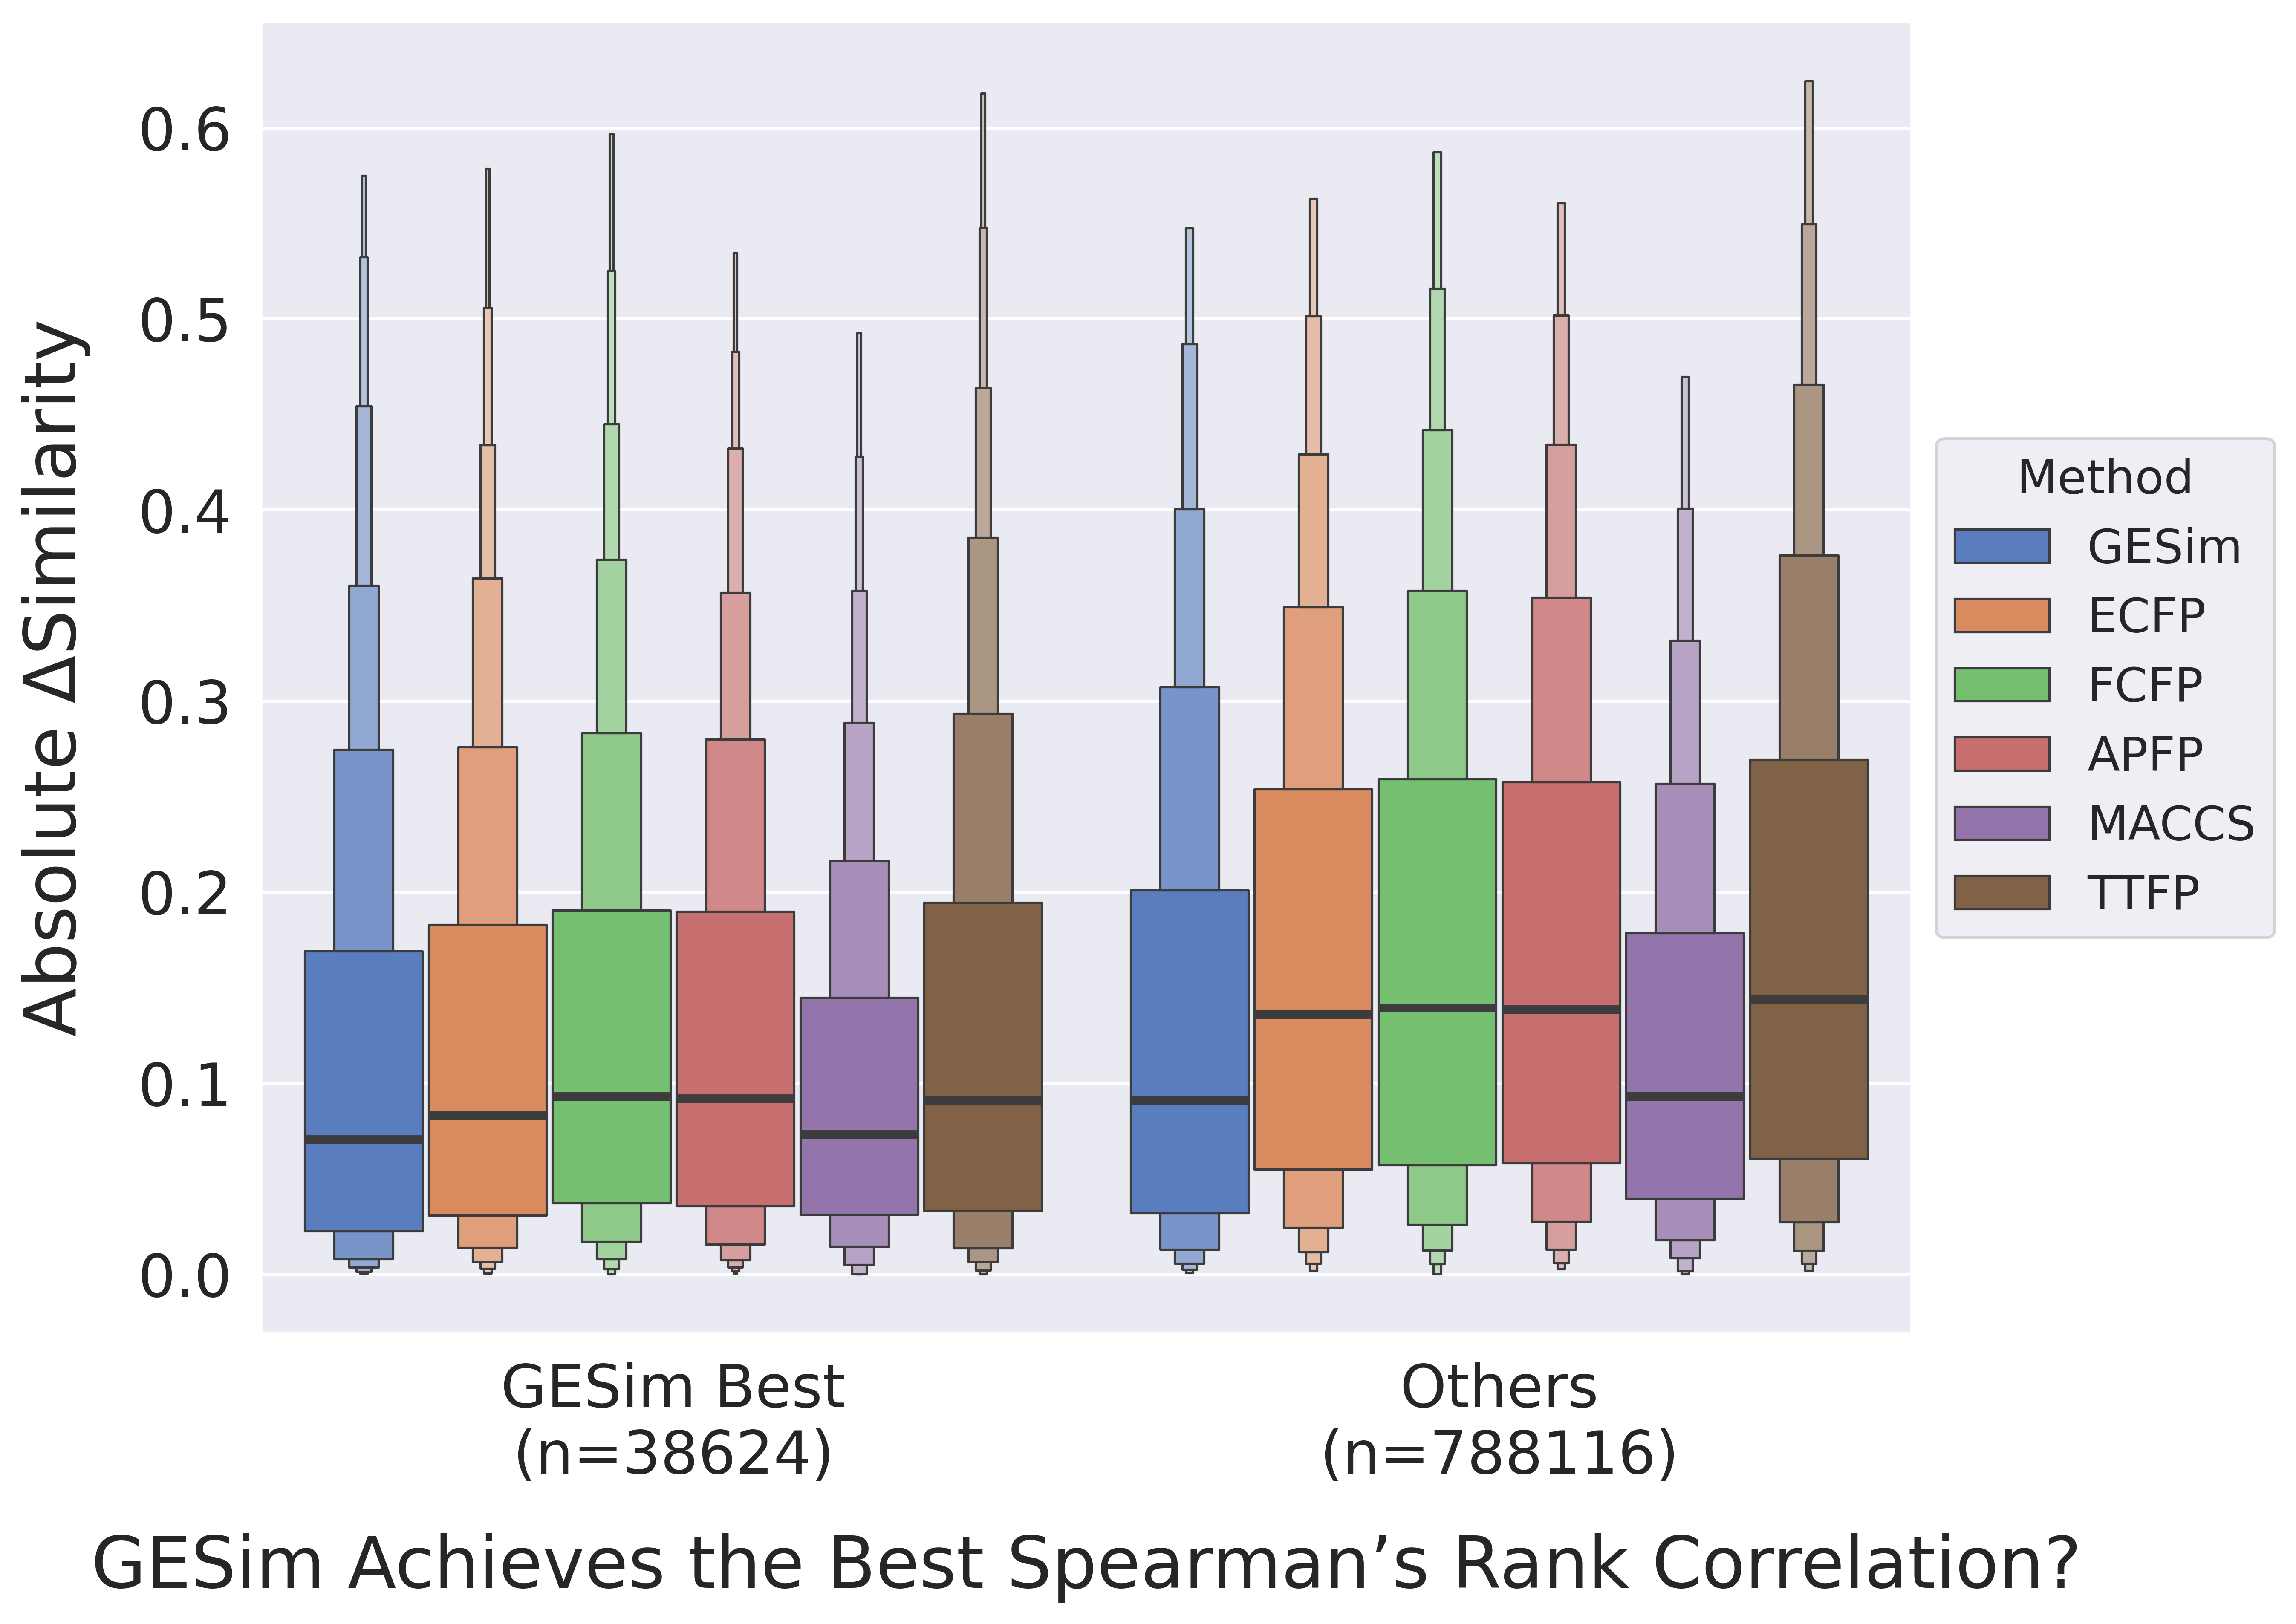

In [9]:
df_melted = df_analysis.melt(
    id_vars=["is_best_rho_gesim"],
    var_name="Method",
    value_vars=["gesim_rank1_4_diff_abs", "ecfp_rank1_4_diff_abs", "fcfp_rank1_4_diff_abs", "apfp_rank1_4_diff_abs", "maccs_rank1_4_diff_abs", "ttfp_rank1_4_diff_abs"],
    value_name="Similarity Difference",
    ignore_index=True,
)
df_melted["Method"] = df_melted["Method"].str.replace("_rank1_4_diff_abs", "", regex=True)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)

sns.boxenplot(
    data=df_melted,
    x='is_best_rho_gesim',
    y="Similarity Difference",
    hue='Method',
    ax=ax,
    palette=sns.color_palette("muted")[:6],
    dodge="auto",
    gap=0.05,
    k_depth='proportion',
    outlier_prop=0.05,
    showfliers=False,
    width=0.9,
    line_kws=dict(linewidth=3.0),
    order=[True, False],
)
vcounts = df_analysis["is_best_rho_gesim"].value_counts()
xlabel_dict = {
    "True": f"GESim Best\n(n={vcounts[True]})",
    "False": f"Others\n(n={vcounts[False]})",
}
xticklabels = [xlabel_dict[label.get_text()] for label in ax.get_xticklabels()]
ax.set_xticklabels(xticklabels, fontsize=20)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)
ax.set_xlabel("GESim Achieves the Best Spearman’s Rank Correlation?", fontsize=24, labelpad=16)
ax.set_ylabel("Absolute ΔSimilarity", fontsize=24, labelpad=16)
handles, labels = ax.get_legend_handles_labels()
rename_method_dict = {
    "gesim": "GESim",
    "ecfp": "ECFP",
    "fcfp": "FCFP",
    "maccs": "MACCS",
    "apfp": "APFP",
    "ttfp": "TTFP",
}
ax.legend(
    handles,
    [rename_method_dict[l] for l in labels],
    title="Method",
    loc="upper left",
    bbox_to_anchor=(1, 0.7),
    fontsize=16,
    title_fontsize=16,
    frameon=True,
)

# Multi Assay

Count of >0.8
mfp: 1061.0
fcfp: 1023.0
maccs: 913.0
apfp: 974.0
ttfp: 1055.0
gesim: 1018.0


/tmp/ipykernel_3642854/1236790999.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=16, rotation=30)
/tmp/ipykernel_3642854/1236790999.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)


Text(0, 0.5, 'Count')

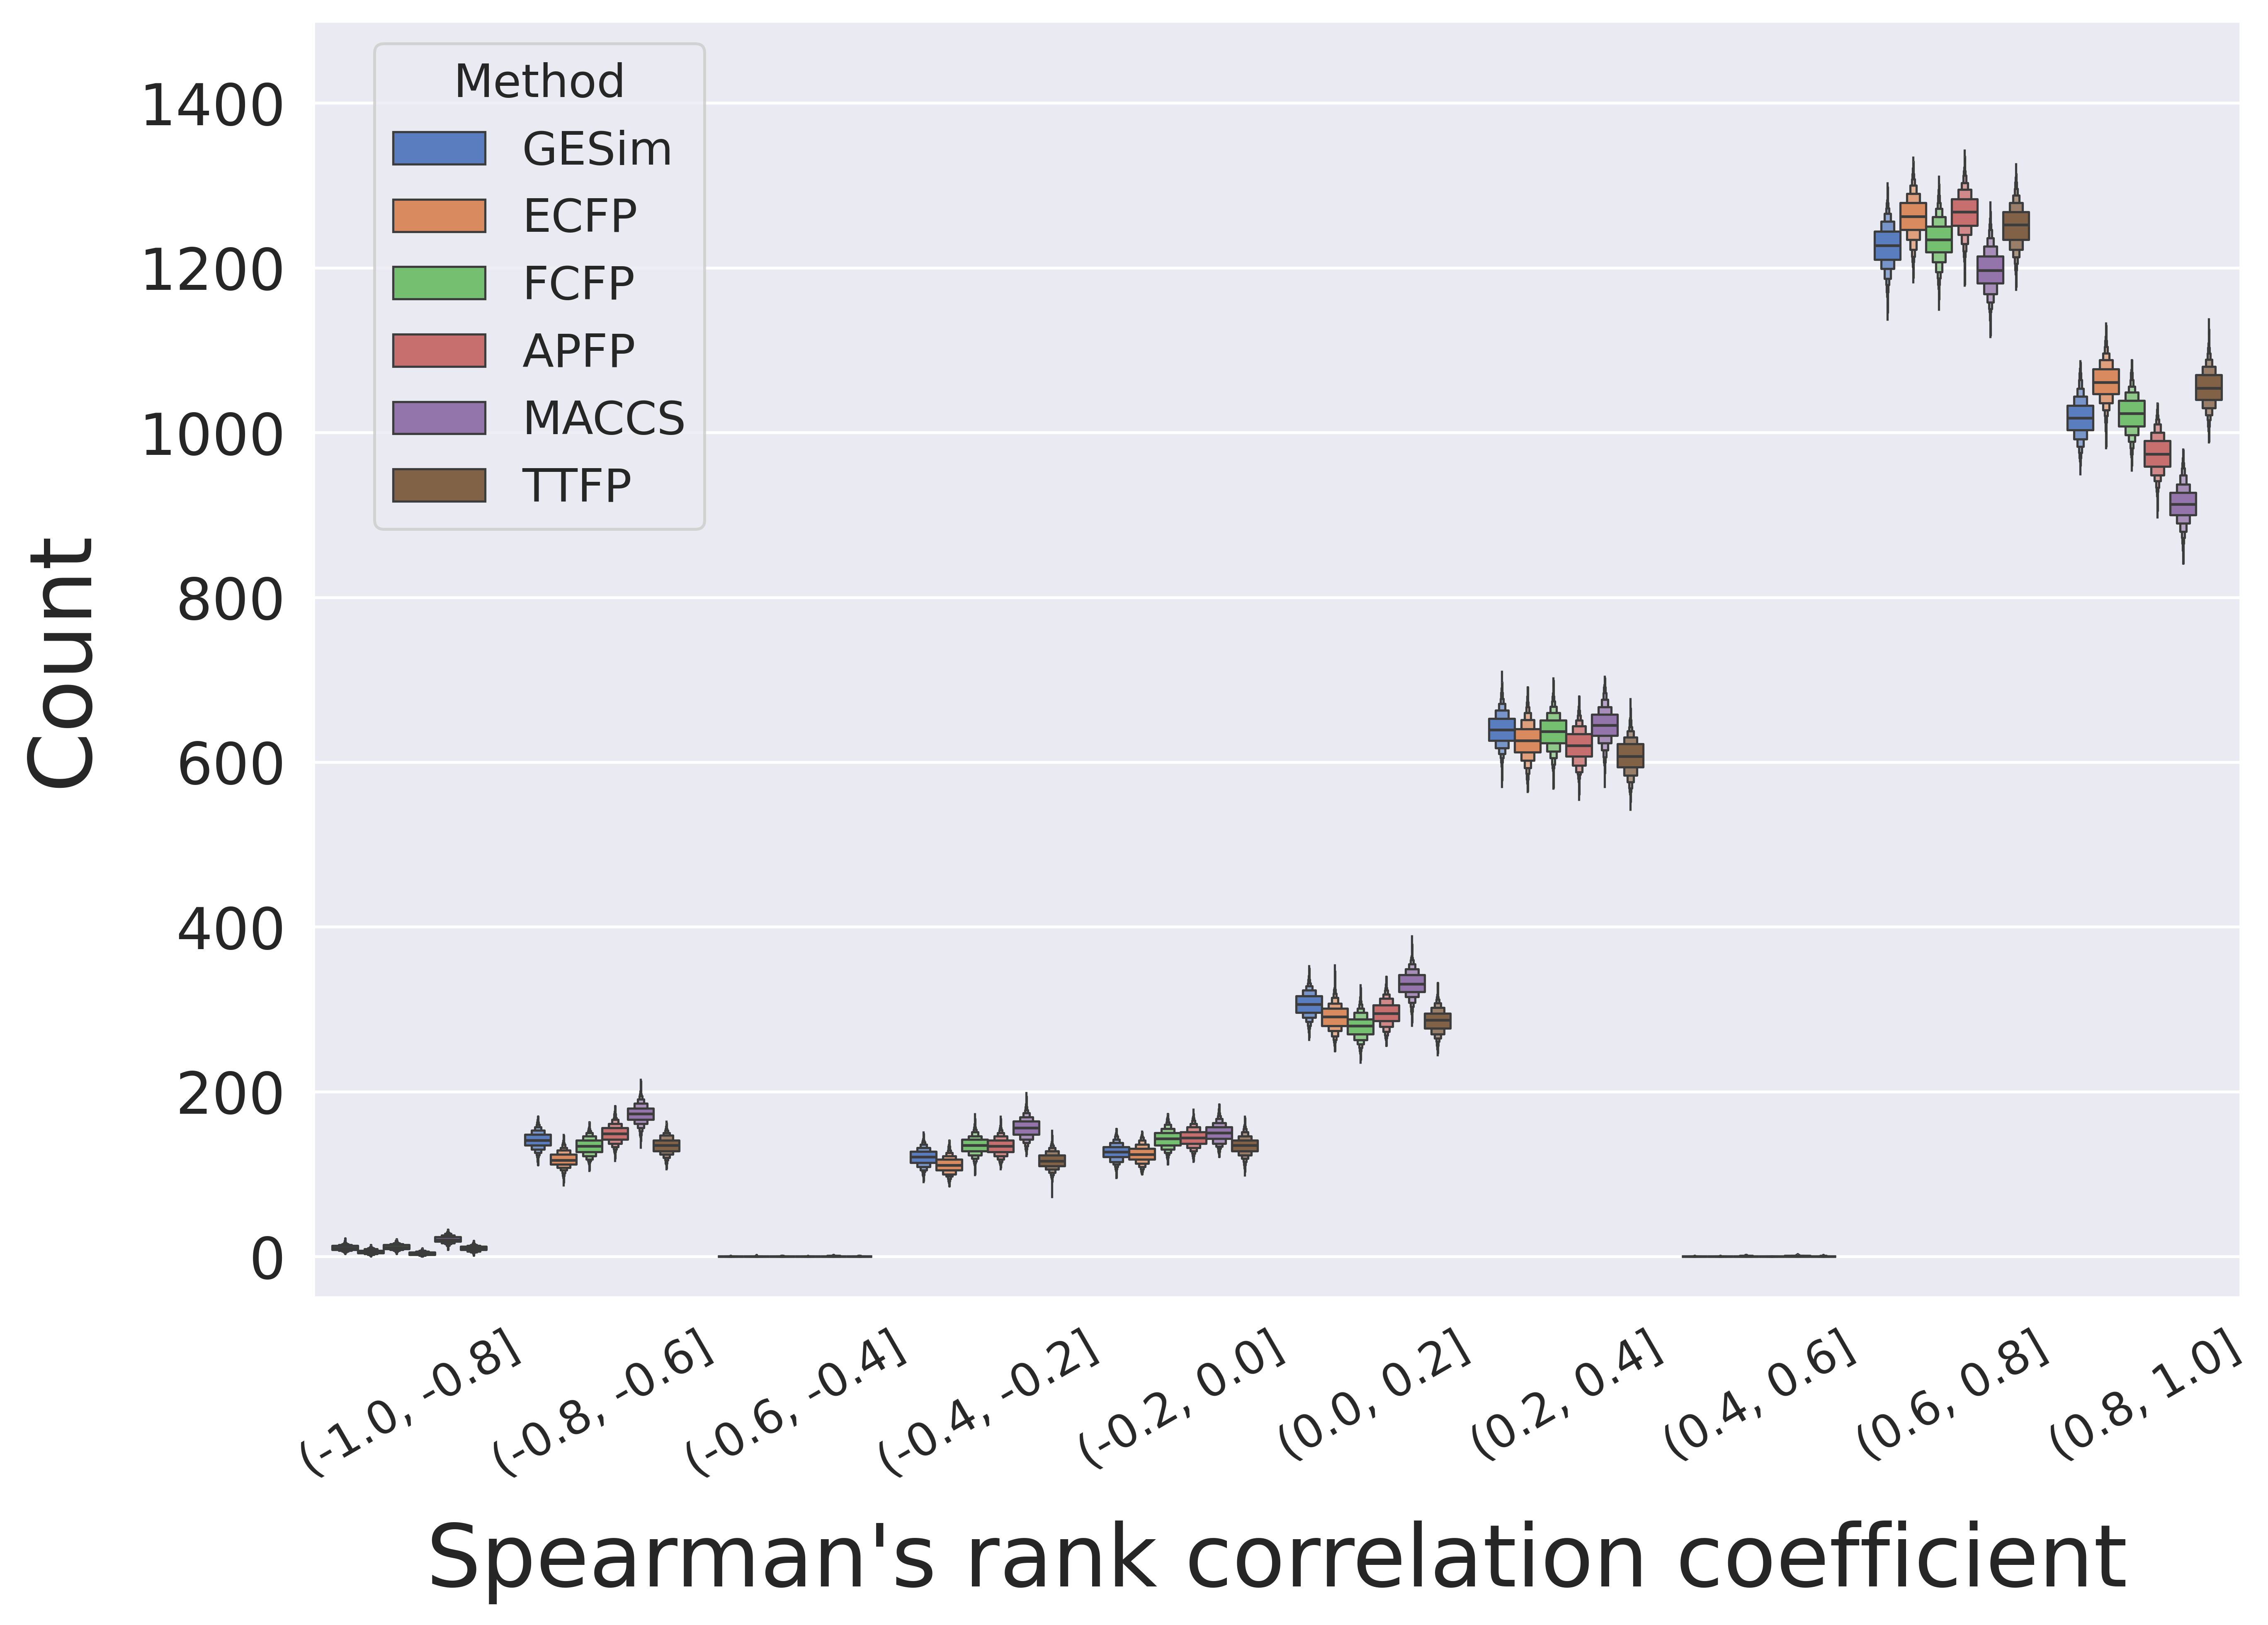

In [11]:
with open('result/similaritybenchmark/result_multi_assay.pkl', 'rb') as f:
    result_dict = pickle.load(f)

print("Count of >0.8")
for k in result_dict.keys():
    df = pd.DataFrame(result_dict[k])
    corr_cnt = (df > 0.8).sum(axis=1).mean()
    print(f"{k}: {round(corr_cnt, 0)}")
    
    

bins = [round(i, 2) for i in np.linspace(-1, 1, 11)]
concat_list = []

method_list = ['ttfp', 'maccs', 'apfp', 'fcfp', 'mfp', 'gesim']  # To unify the colors of LBVS and SS benchmarks
rename_dict = {
    "ttfp": "TTFP",
    "maccs": "MACCS",
    "apfp": "APFP",
    "fcfp": "FCFP",
    "mfp": "ECFP",
    "gesim": "GESim",
}
for method_name in method_list:
#for method_name in result_dict.keys():
    for i in range(len(result_dict[method_name])):
        bin_count_df = pd.cut(result_dict[method_name][i], bins=bins).value_counts().rename_axis('bins').reset_index()
        bin_count_df['method'] = [rename_dict[method_name] for _ in range(bin_count_df.shape[0])]
        concat_list.append(bin_count_df)
df_vis = pd.concat(concat_list)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
sns.boxenplot(
    data=df_vis.iloc[::-1],
    x='bins',
    y="count",
    hue='method',
    ax=ax,
    #palette=sns.color_palette("muted")[:6][::-1],
    palette=sns.color_palette("muted")[:6],
    dodge=0.6,
    k_depth='full',
    width=0.8,
)
ax.set_ylim([-50, 1500])
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[::-1], labels[::-1], title="Method", loc='upper left', bbox_to_anchor=(0.02, 1.), fontsize=16, title_fontsize=16, frameon=True)
ax.legend(title="Method", loc='upper left', bbox_to_anchor=(0.02, 1.), fontsize=16, title_fontsize=16, frameon=True)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16, rotation=30)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)
ax.set_xlabel("Spearman's rank correlation coefficient", fontsize=30, labelpad=12)
ax.set_ylabel("Count", fontsize=30, labelpad=12)

#fig = plt.figure(figsize=(12, 8))
#ax = fig.add_subplot(1, 1, 1)
#sns.pointplot(data=df_vis, x='bins', y="count", hue='method', ax=ax, errorbar='sd', errwidth=2,
#              palette=sns.color_palette("muted")[:6][::-1], dodge=0.35, markersize=6)
#ax.set_ylim([-50, 1500])
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[::-1], labels[::-1], title="Method", loc='upper left', bbox_to_anchor=(0.02, 1.), fontsize=18, title_fontsize=18, frameon=True)
#ax.set_xticklabels(ax.get_xticklabels(), fontsize=16, rotation=30)
#ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)
#ax.set_xlabel("Spearman's rank correlation coefficient", fontsize=30, labelpad=12)
#ax.set_ylabel("Count", fontsize=30, labelpad=12)